In [52]:
library(ggplot2)
library(dplyr)

In [39]:
# Scenario: A salesman has scheduled two appointments to sell encyclopedias. His
# first appointment will lead to a sale with probability 0.3, and his second
# will lead independently to a sale with probability 0.6. Any sale made is equally
# likely to be either for the deluxe model, which costs Rs. 1000, or the standard
# model, which costs $500. Let X be the random variable representing the total 
# Rupee value of sales. What are the different values that X can take? What are
# the associated probabilities?

# Monte-Carlo simulation 
# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
S_appointment = c(0, 1)

# Sampling space for book sales (500 corresponds to standard edition, 1000 corresponds to deluxe edition)
S_book = c(500, 1000)

# Appointment success and failure probabilities
p_appointment = matrix(nrow  = 2, ncol = 2, c(0.7, 0.4, 0.3, 0.6))

# Book type probabilities
p_book = c(0.5, 0.5)

samplesize = 1e5

# Returns the earnings from one trial of the experiment
salesResult = function(){
  result = numeric(2)  
  # Simulate whether sales happen in first and second appointments
  for (j in c(1:2)){
      result[j] = sample(S_appointment, size = 1, prob = p_appointment[j, ])
      }    
  # Calculate earnings if sales happen in first and second appointments
  return(ifelse(result[1] == 1, sample(S_book, size = 1, prob = p_book), 0) +
  ifelse(result[2] == 1, sample(S_book, size = 1, prob = p_book), 0))
}

simulatedData = replicate(samplesize, salesResult())
#print(simulatedData)
table(simulatedData)
table(simulatedData) / samplesize
sum(table(simulatedData) / samplesize)

simulatedData
    0   500  1000  1500  2000 
27812 27298 31478  8930  4482 

simulatedData
      0     500    1000    1500    2000 
0.27812 0.27298 0.31478 0.08930 0.04482 

[1] 1

X = total earnings from one attempt 

X is a discrete random variable 

X = 0, 500, 1000, 1500, 2000

P(X = 0)  = 0.27, P(X = 500) = 0.28, P(X = 1000) = 0.315, P(X = 1500) = 0.09, P(X = 2000) = 0.045

Probability Mass Function (PMF) of the random variable X

$P_X(0) = P(X = 0) = 0.27$

$P_X(500) = P(X = 500) = 0.28$

$P_X(1000) = P(X = 1000) = 0.315$

$P_X(1500) = P(X = 1500) = 0.09$

$P_X(2000) = P(X = 2000) = 0.045$

,Earning
,<dbl>
1,500
2,500
3,500
4,0
5,0


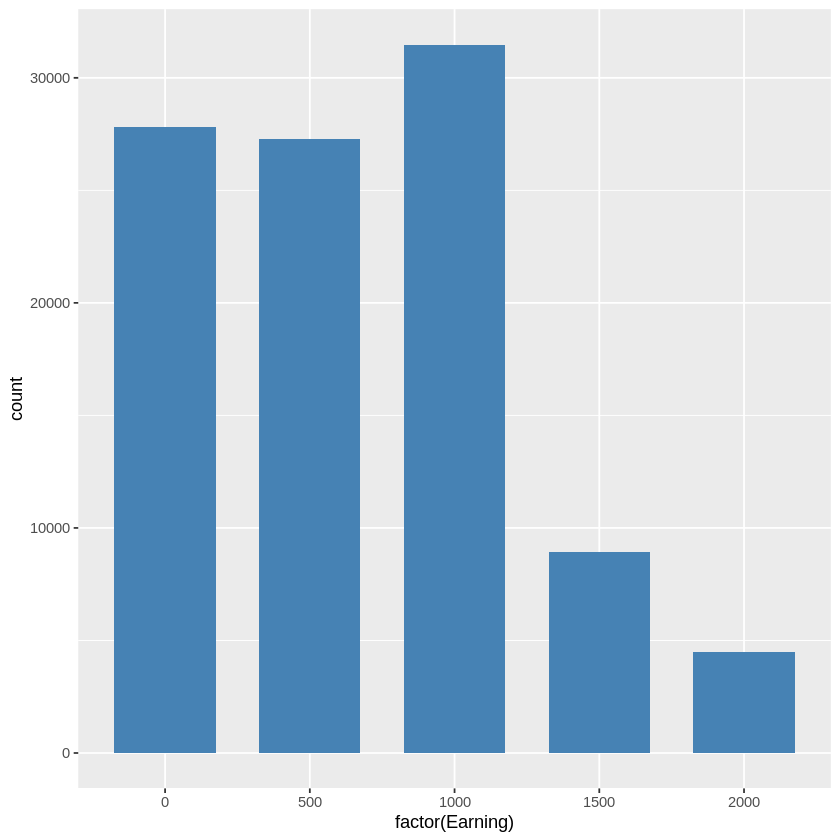

In [64]:
dfSales = as.data.frame(simulatedData)
colnames(dfSales) = c('Earning')
head(dfSales, 5)
p = ggplot(data = dfSales, aes(x = factor(Earning))) +
  geom_bar(stat = 'count', width = 0.7, fill = 'steelblue')+
      theme_minimal()
p  

In [ ]:
factor(dfSales$Earning)

In [65]:
table(simulatedData)

simulatedData
    0   500  1000  1500  2000 
27812 27298 31478  8930  4482 

,Earning,Frequency
,<fct>,<int>
1,0,27812
2,500,27298
3,1000,31478
4,1500,8930
5,2000,4482


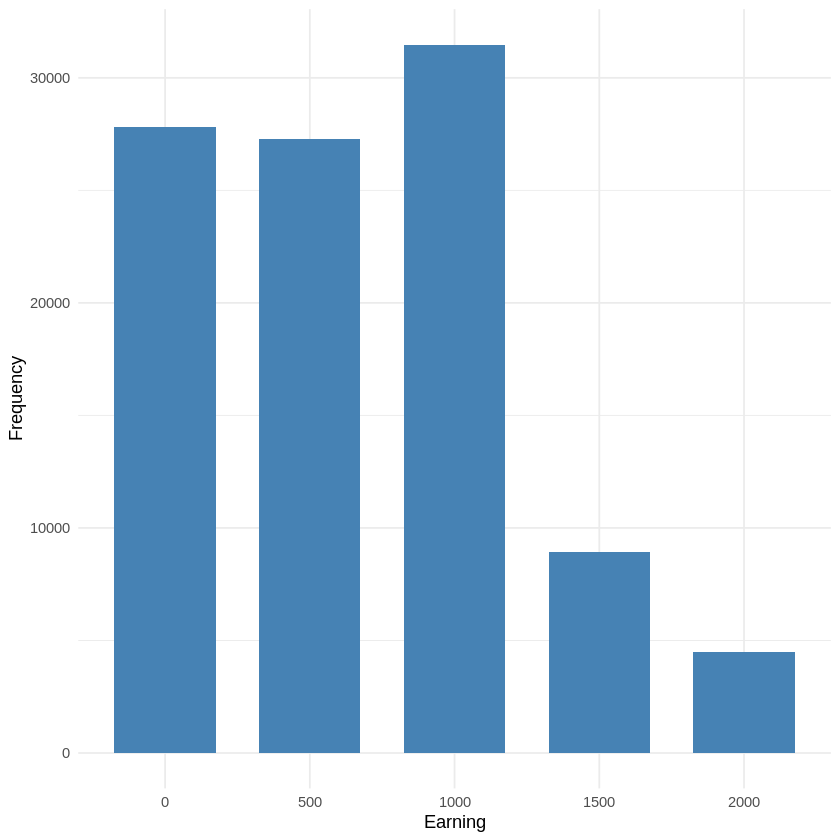

In [68]:
dfSales = as.data.frame(table(simulatedData))
colnames(dfSales) = c('Earning', 'Frequency')
head(dfSales, 5)
p = ggplot(data = dfSales, aes(x = Earning, y = Frequency)) +
  geom_col(width = 0.7, fill = 'steelblue') +
    theme_minimal()
p  

In [ ]:
matrix(nrow  = 2, ncol = 2, c(1, 2, 3, 4), byrow = TRUE)

In [33]:
value = 0
ifelse(value == 0, 'zero', 'not zero')

[1] "zero"

In [35]:
matrix(nrow  = 2, ncol = 2, c(0.7, 0.4, 0.3, 0.6))

0.7,0.3
0.4,0.6


In [36]:
anarray = c(1,1,1,2,2,3,3,3,3,4,4,4,4,4,4)
table(anarray)

anarray
1 2 3 4 
3 2 4 6 

Expected value of the random variable $X$

$\begin{align*}E[X] &= \sum_x x\times P_X(x)\\&= 0\times P_X(0)+500\times P_X(500)+1000\times P_X(1000)+1500\times P_X(1500)+2000\times P_X(2000)\\&\approx 0 \times\underbrace{\frac{\text{No. of times 0 appeared}}{\text{samplesize}}}_{=\text{approximation to }P_X(0)}+\cdots\end{align*}$

In [71]:
# Expected earnings using simulated values
mean(simulatedData)

x = c(0, 500, 1000, 1500, 2000)
p = c(0.28, 0.27, 0.315, 0.09, 0.045)

# Expected earnings calculated analytically
sum(x * p)

[1] 674.86

[1] 675

Variance of the random variable $X$

$\begin{align*}\text{Var}[X] &= E[(X-E[X])^2]\\&=
\sum_x (x-E[X])^2\times P_X(x)\\&= (0-675)^2\times P_X(0)+(500-675)^2\times P_X(500)+(1000-675)^2\times P_X(1000)+(1500-675)^2\times P_X(1500)+(2000-675)^2\times P_X(2000)\end{align*}$

Standard deviation of the random variable $X$

$\begin{align*}\text{SD}[X] &= \sqrt{E\left[(X-E[X])^2\right]}\end{align*}$

In [74]:
# Variance of the earnings using simulated values
mean((simulatedData - mean(simulatedData))^2)

x = c(0, 500, 1000, 1500, 2000)
p = c(0.28, 0.27, 0.315, 0.09, 0.045)

# Variance of the earnings calculated analytically
sum((x-sum(x*p))^2 * p)

# Standard deviation of the random variable X
sqrt(sum((x-sum(x*p))^2 * p))

[1] 307794

[1] 309375

[1] 556.2149